In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math
from mpl_toolkits.mplot3d import Axes3D
from random import random
#from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import  Ridge
from sklearn.preprocessing import PolynomialFeatures

<h2 id='poly' >Polynomial Regression </h2>

In statistics , polynomial regression is a form of regression analysis in which the relationship between the independent variable $x$ and the dependent variable $y$ is modelled as an $n^{th}$ degree polynomial in $x$.In Machine learning the polynomial regression is just the extended Linear Regression.This extension we achieve by the tranform the dataset as will shown below. 
Let's generate the data.

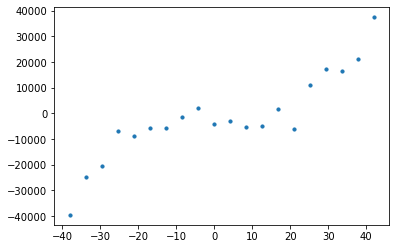

In [3]:
np.random.seed(0)
x = 2 - np.linspace(-10,10,num=20) *4    #np.linspace(-10,10,num=10)  
y = x - 2 * (x ** 2) + 0.5 * (x ** 3)  +100*np.random.normal(-50, 50, size=x.size)  
x = x[:, np.newaxis]
y = y[:, np.newaxis]
plt.scatter(x,y, s=10)
plt.show()

In [5]:
model = LinearRegression().fit(x,y)
y_pred = model.predict(x)

Text(0.5, 1.0, 'accuracy = 0.7767230510045652')

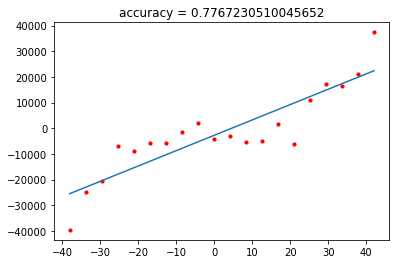

In [6]:
plt.plot(x, y_pred)  #L = 0.0028
plt.scatter(x,y, s=10,color='r')
plt.title('accuracy = {}'.format(model.score(x,y)))

Using the straight line model we achieve $R^2 = 77$% accuracy.To reach a more accurately result we can improve the model by increasing the complexity using higher order equation.We can add new features that are powers of the original features.

The linear model $Y = \omega_0  + \omega_1x$ can be tranformed to 
$Y = \omega_0  + \omega_1 x^1 + \omega_1 x^2$ or to
$Y = \omega_0  + \omega_1 x^1 + ... + \omega_p x^p$ polynomial.In ML we can make that by adding new features to the dataset, the new features are generated by the power of $𝑛_{𝑡ℎ}$ degree of existing ones.

$$X = \begin{bmatrix} 
 x_1 \\
\vdots   \\
 x_n \\
\end{bmatrix} 	\rightarrow 
X_{polyData} = T(X) = \begin{bmatrix} 
1 &x_1 & x_1^2 & \dots & x_1^p \\
\vdots & \ddots &  \ddots & \vdots & \vdots \\
1& x_n & x_n^2  & \dots & x_n^p \\
\end{bmatrix} $$

The new Dataset 𝑇(𝑋) can be trained in Multiple Linear regression $Y = \omega_0  + \omega_1 x^1 + ... + \omega_p x^p$

To convert the original features into their higher order terms we will use the <mark>PolynomialFeatures</mark> class provided by <mark>scikit-learn</mark>.


example of tranformation of dataset to higher order degree :

In [303]:
polynomial_features= PolynomialFeatures(degree=4)
polynomial_features.fit_transform(np.array([[1],[2],[3]]))

array([[ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  2.,  4.,  8., 16.],
       [ 1.,  3.,  9., 27., 81.]])

 $$X = \begin{bmatrix} 
 1 \\
 2   \\
 3 \\
\end{bmatrix} 	\rightarrow
X_{polyData} = T(X) = \begin{bmatrix} 
1 & 1 & 1   \\
1 & 2 &  4 \\
1& 3 & 9 \\
\end{bmatrix} $$ T(X) 2 degree

Let's train our data for $n^1,n^2,n^3$ degree polynomial model. 

In [26]:
def polynomial_tranform(X,degree):
    '''
    applying standard scaler and transform data into polynomial     
    '''
    x_data = PolynomialFeatures(degree=degree).fit_transform(X)   
    return StandardScaler().fit_transform(x_data)

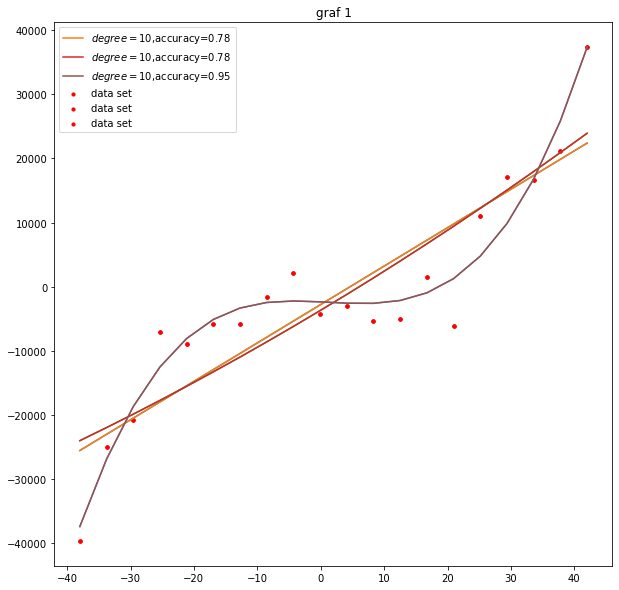

In [325]:
plt.rcParams["figure.figsize"] = (10,10)
for degree in 1,2,3:
    x_poly = polynomial_tranform(x,degree)
    model = LinearRegression().fit(x_poly,y)
    y_pred = model.predict(x_poly)
    plt.plot(x, y_pred)
    plt.plot(x, y_pred,label="$degree = {}$,accuracy={:.2f}".format(i,model.score(x_poly,y)))  #L = 0.0028
    plt.scatter(x,y, s=10,color='r',label="data set")
    plt.title('graf 1')
    plt.legend()
plt.show()    

From the above graphic we see that the Polynomial $n^3$ model fit the data with an accuracy $0.95$ wich is the best.For $n^2$ and $n^1$ we
obtain the accuracy $0.78$,this models are <mark>under-fitted</mark>.

<h2> Bias and Variance </h2>


Let's train our data for  $𝑛^1,𝑛^3,𝑛^{25}$  degree polynomial model.

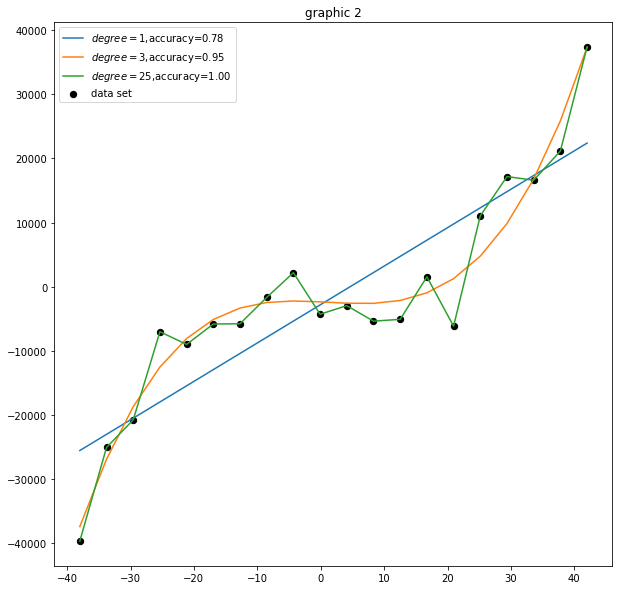

In [60]:
for degree in 1,3,25:
    x_poly = polynomial_tranform(x,degree)
    model = LinearRegression().fit(x_poly,y)
    y_pred = model.predict(x_poly)
    plt.plot(x, y_pred,label="$degree= {}$,accuracy={:.2f}".format(degree,model.score(x_poly,y)))  #L = 0.0028

plt.scatter(x,y, s=40,color='black',label="data set")    
plt.legend()
plt.title('graphic 2')
plt.show() 

array([[ 0.        ,  1.64750894,  2.19134813,  2.48301817,  2.8627718 ],
       [ 0.        ,  1.47408695,  1.56240383,  1.77471891,  1.62194883],
       [ 0.        ,  1.30066495,  0.99983888,  1.20790772,  0.7333769 ],
       [ 0.        ,  1.12724296,  0.50365328,  0.76681993,  0.12308607],
       [ 0.        ,  0.95382097,  0.07384702,  0.43569085, -0.27416563],
       [ 0.        ,  0.78039897, -0.28957989,  0.19875578, -0.51489212],
       [ 0.        ,  0.60697698, -0.58662746,  0.04025004, -0.6468793 ],
       [ 0.        ,  0.43355498, -0.81729569, -0.05559106, -0.70918506],
       [ 0.        ,  0.26013299, -0.98158456, -0.1045322 , -0.73213927],
       [ 0.        ,  0.086711  , -1.0794941 , -0.12233809, -0.73734379],
       [ 0.        , -0.086711  , -1.11102429, -0.12477341, -0.73767243],
       [ 0.        , -0.26013299, -1.07617513, -0.12760284, -0.73727101],
       [ 0.        , -0.43355498, -0.97494663, -0.14659108, -0.73155732],
       [ 0.        , -0.60697698, -0.8

<ul>
  <li>For degree=1 (blue curve) as we've concluded the model is under-fit does not work the job well, we call that  <mark> high-bias </mark>.
Bias refers to the error due to the model’s simplistic assumptions in fitting the data.A high bias means that the model is unable to capture the patterns in the data and that results in <mark>under-fitting</mark>.</li> <br> <br>
  <li>For degree=25(greel curve) the model fits training data too much well (100 accuracy).At all that is a bad sign.In general, this means that the errors(bias or noise) of data is captured too wich is called <mark>over-fitting</mark>.The origin of the problem is that the model is too complex it has <mark>high-variance</mark>.Variance refers to the error due to the complex model trying to fit the data. High variance means the model passes through most of the data points and it results in over-fitting the data.This model will handle the new data bad</li> <br> <br>
  <li>For degree=2 ( orange curve ) the model is both simple and well,
      in ML terms it has <mark>low-bias</mark> and <mark>low-variance</mark>.  It satisfyingly fits data(acc=95%) that's way is the best,we call it <mark> best-fitting</mark>
</ul>  

Ideally, a machine learning model should have low variance and low bias.Therefore to achieve a good model that performs well both on the train and unseen data, a trade-off is made.
<img src='https://randlow.github.io/images/ml/tradeoff_cost_bias.png' alt="Italian Trulli">

<h2> Lasso Regression (L1 Regularization) </h2>

When we used the degree=25 we came accros the over-fiting.There are quite a number of techniques that help to prevent overfitting.Regularization is one such technique.Regularization basically aims at proper feature selection to avoid over-fitting.
Lasso regression achieves regularization by completely diminishing the importance given to some features (making the weight zero).

Lasso regression is also called L1 regression since it uses the L1 norm for regularization.In Lost function of Least-squared

 $$ \hspace{1cm} J(w) = \frac{1}{2m}\sum_{i}^m( \omega_0 + \omega_1 x^i_{1} + \omega_2 x_{2}^i+ ...\omega_p x_{p}^i - y^i)^2 + \sum_k^p\lambda |w_k| $$

where $\frac{1}{2m}\sum_{i}^m( \omega_0 + \omega_1 x^i_{1} + \omega_2 x_{2}^i+ ...\omega_p x_{p}^i - y^i)^2 $ is just ordinary least-squared for linear regression 

and constraint $\sum_k^p\lambda |w_k|$

A tuning parameter, $λ$ controls the strength of the L1 penalty. $λ$ is basically the amount of shrinkage:
<ul>
  <li>When λ = 0, no parameters are eliminated. The estimate is equal to the one found with linear regression.</li>
<li> As λ increases, more and more coefficients are set to zero and eliminated (theoretically, when $λ = ∞$, all coefficients are eliminated). </li>
    <li> As λ increases, bias increases. </li>
    <li> As λ decreases, variance increases. </li>
</ul>    

Let's back to our data and generated the model with 12 degree polynomial

In [1]:
x_poly = polynomial_tranform(x,15)
linear_model = LinearRegression().fit(x_poly,y)
y_pred_linear = linear_model.predict(x_poly)
plt.plot(x, y_pred_linear)
plt.scatter(x,y, s=40,color='black',label="data set") 


NameError: name 'polynomial_tranform' is not defined

For now wee will use the </mark> Lasso </mark> from <mark>sklearn</mark>

In [322]:
lasso_model =  Lasso(alpha=20).fit(x_poly,y) 
y_pred_lasso = lasso_model.predict(x_poly)

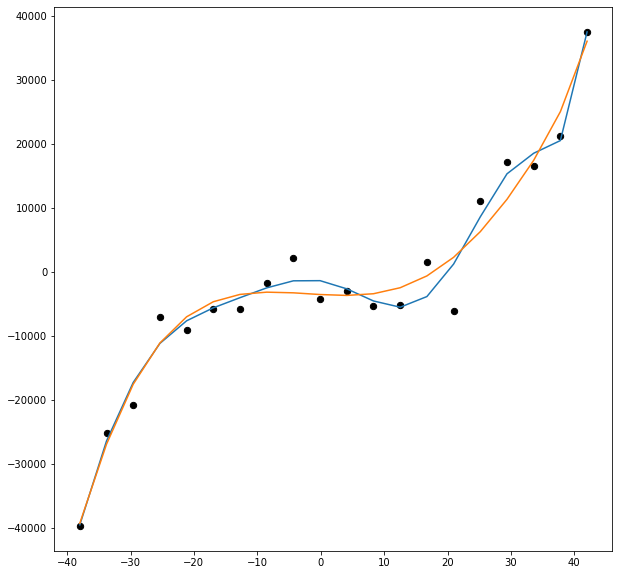

In [323]:
plt.plot(x, y_pred_linear)
plt.plot(x, y_pred_lasso)
plt.scatter(x,y, s=40,color='black',label="data set") 

The orange curve comes from Lasso regression fits data well and over-fitting is decreased because the Lasso shrinkage the weights which are associated with the higher degree of the polynomial.In this case maybe the $w$ asociated with $x^p$ where p>3 are tend to zero.

In [324]:
key = []
for i in range(lasso_model.coef_.size):
    key.append('w_'+str(i))
pd.DataFrame(np.array([linear_model.coef_[0],lasso_model.coef_]).T,columns = ['Linear','Lasso'],index=key)


,Linear,Lasso
w_0,0.000000,0.000000
w_1,-3983.629769,-1420.484546
w_2,-20771.205192,1974.834765
w_3,11984.485216,17888.515108
w_4,116186.048479,0.000000
w_5,71511.507018,-0.000000
w_6,-213769.404542,-6475.754602
w_7,-131524.280564,-0.000000
w_8,152700.638364,-0.000000
w_9,69529.165183,0.000000


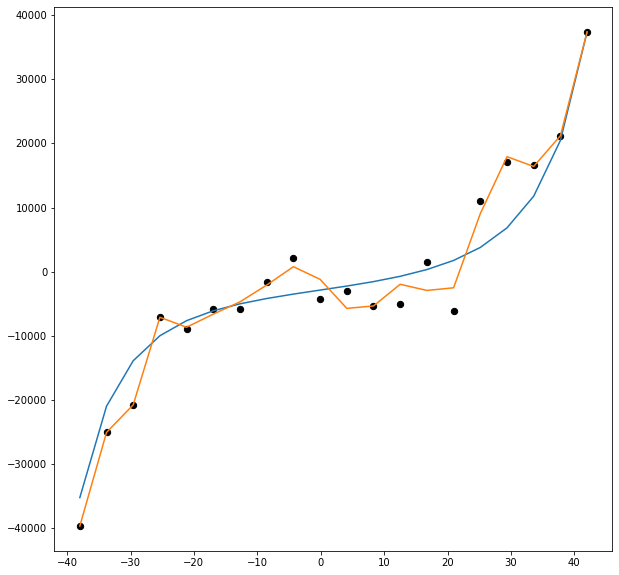

In [351]:
ridge_model =  Ridge(alpha=10).fit(x_poly,y) 
y_pred_ridge = ridge_model.predict(x_poly)
plt.plot(x, y_pred_ridge)
plt.plot(x, y_pred_linear)
plt.scatter(x,y, s=40,color='black',label="data set") 

In [352]:
ridge_model.coef_
#linear_model.coef_[0]

array([[   0.        , 3560.55971326,   65.90858078, 3745.03123245,
        -253.20379081, 2911.97583336, -460.82366458, 2150.98704318,
        -524.92928418, 1582.95793762, -507.45090545, 1177.91559507,
        -454.60115338,  889.94694833, -391.36889842,  682.62397935]])

In [353]:
key = []
for i in range(ridge_model.coef_.size):
    key.append('w_'+str(i))
pd.DataFrame(np.array([linear_model.coef_[0],ridge_model.coef_[0]]).T,columns = ['Linear','ridge'],index=key)


,Linear,ridge
w_0,0.000000e+00,0.000000
w_1,-2.666349e+04,3560.559713
w_2,-4.509006e+04,65.908581
w_3,5.658692e+05,3745.031232
w_4,9.290824e+05,-253.203791
w_5,-5.162653e+06,2911.975833
w_6,-8.234789e+06,-460.823665
w_7,2.559461e+07,2150.987043
w_8,3.491577e+07,-524.929284
w_9,-7.288468e+07,1582.957938


Lasso regression is a type of linear regression that uses <mark>shrinkage</mark>.

Ridge 

References : <br>
https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff <br>
https://www.analyticsvidhya.com/blog/2020/11/lasso-regression-causes-sparsity-while-ridge-regression-doesnt-unfolding-the-math/ <br>